## **Aditya Wahyu Pratama (4101422043)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
#melihat statistika deskriptif
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan output diatas dapat diambil kesimpulan bahwa dataset tersebut terdiri dari 13 kolom dengan jumlah maksimal baris untuk setiap kolomnya adalah 299. Karena seluruh kolom sudah memiliki jumlah baris=299, maka tidak perlu dilakukan pengecekan missing value. Untuk target dari data ini terdapat pada kolom "DEATH_EVENT" yang mengklasifikasikan bahwa pasien itu meninggal atau tidak.

## Cek Outlier


Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
Interquartile
2. Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

## 1. Boxplot

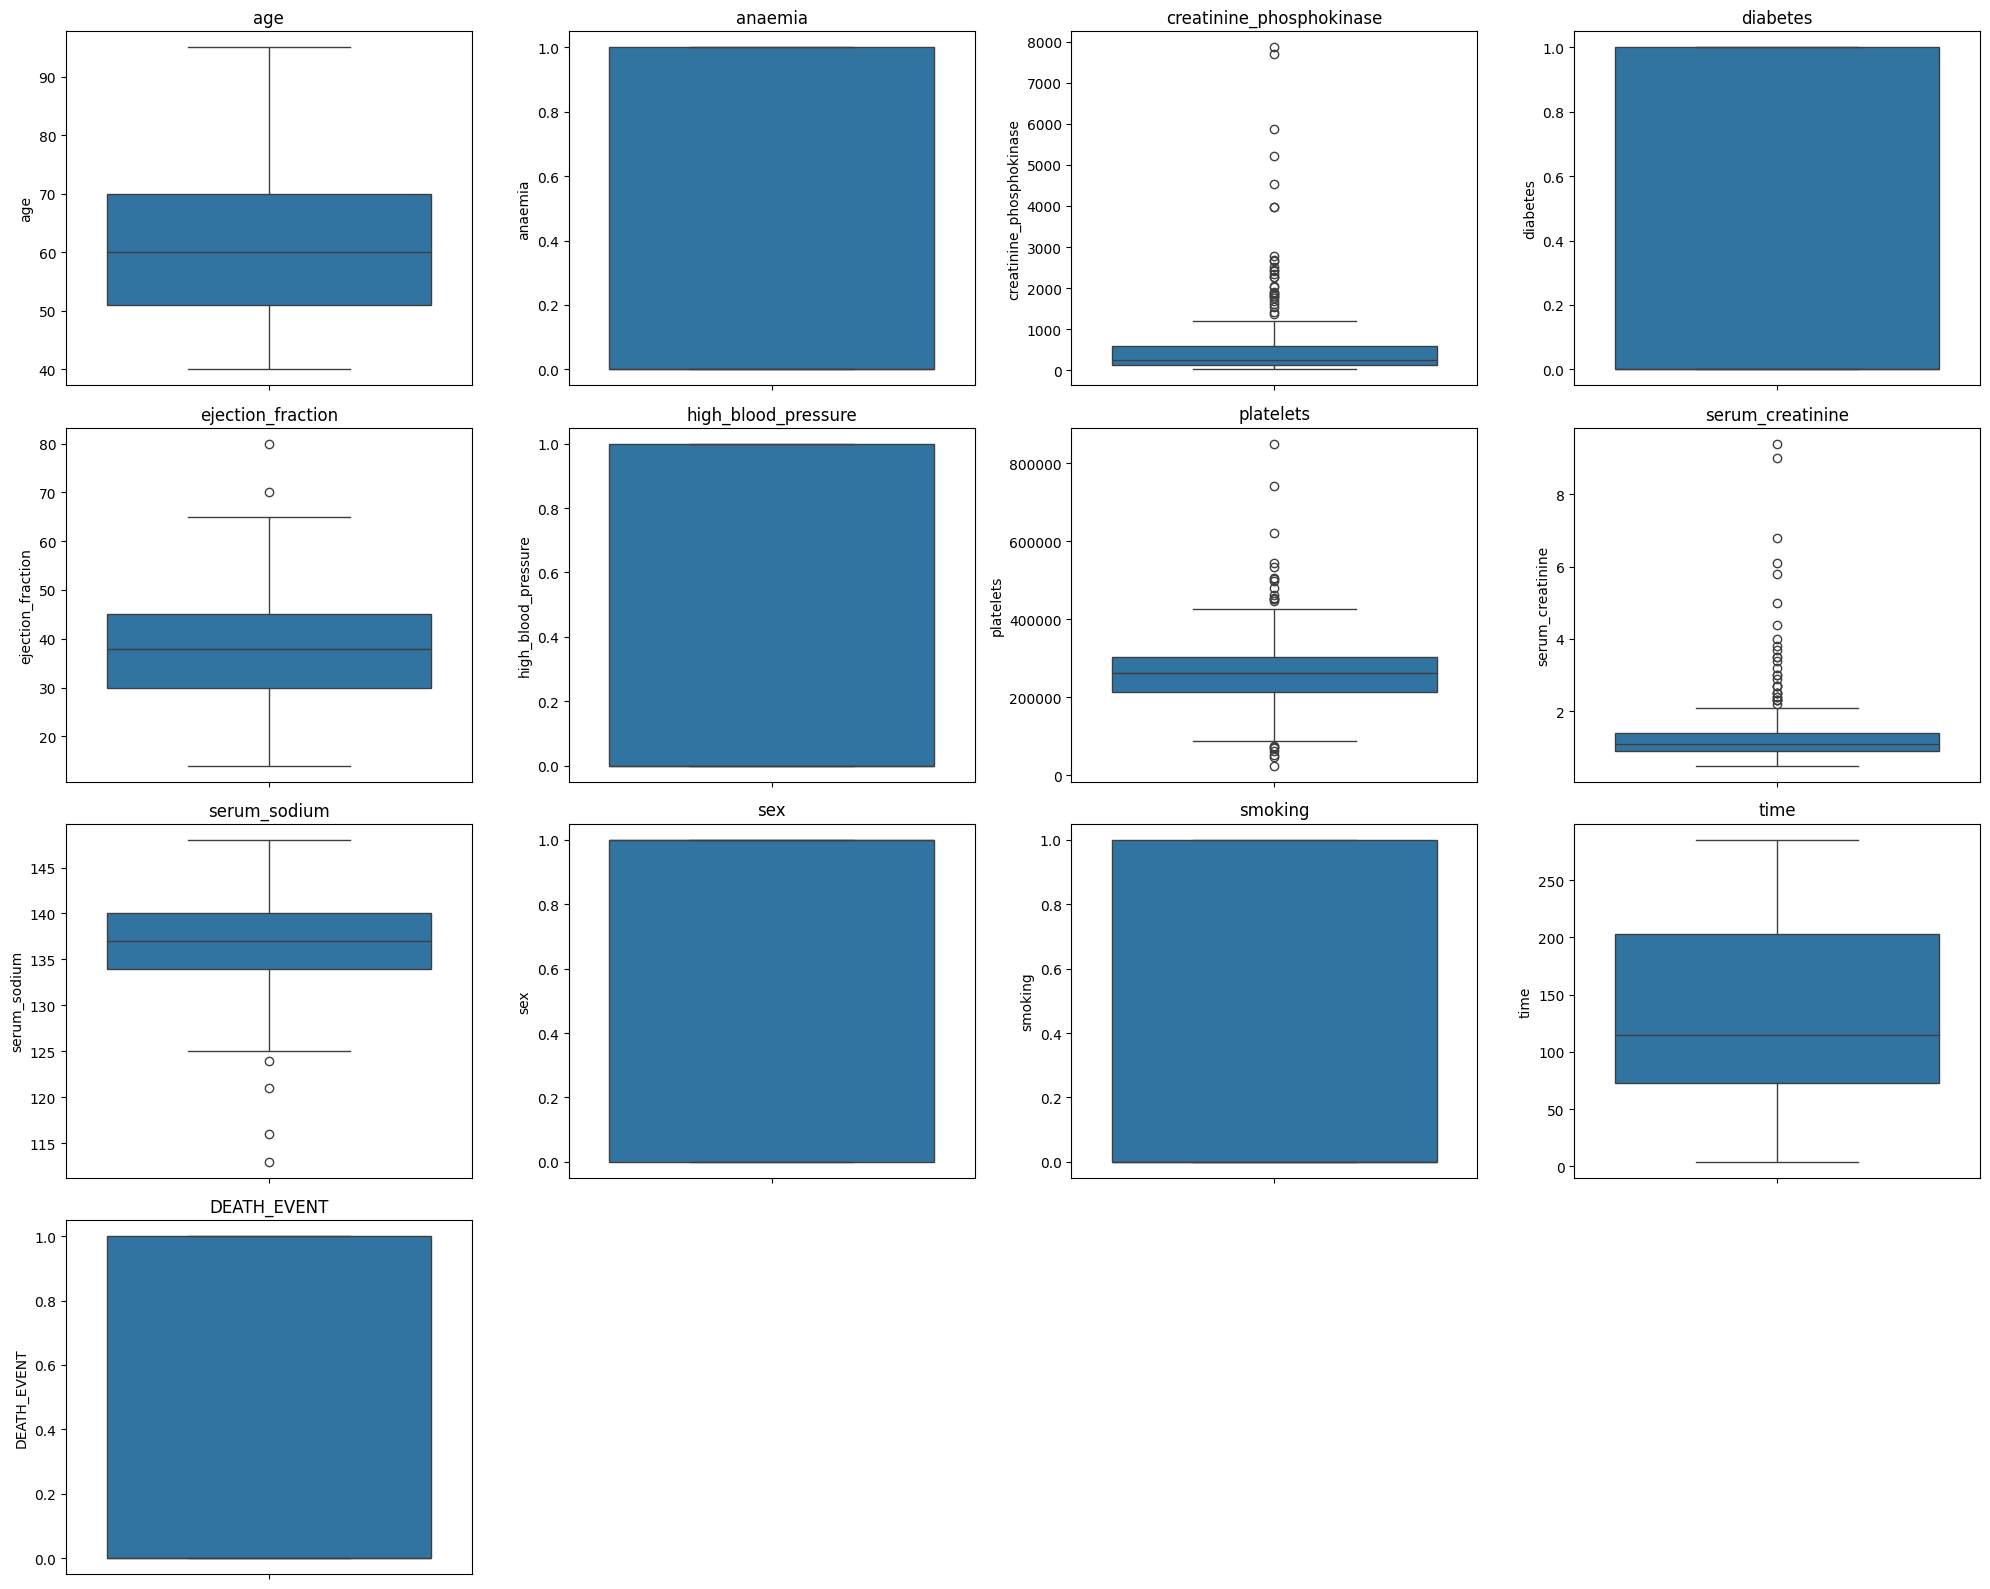

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Kolom numerik yang ingin dicek outliernya
num_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

cols = 4
rows = math.ceil(len(num_cols) / cols)

# Visualisasi Boxplot
plt.figure( figsize=(5*cols, 4*rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 2. IQR

In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
anaemia: 0 outliers
creatinine_phosphokinase: 29 outliers
diabetes: 0 outliers
ejection_fraction: 2 outliers
high_blood_pressure: 0 outliers
platelets: 21 outliers
serum_creatinine: 29 outliers
serum_sodium: 4 outliers
sex: 0 outliers
smoking: 0 outliers
time: 0 outliers
DEATH_EVENT: 0 outliers


Berdasarkan hasil diatas, terdapat beberapa kolom yang memiliki outliers. Untuk menangani outliers tersebut saya menggunakan metode Winsorizoring.

## Penanganan Outliers

In [9]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

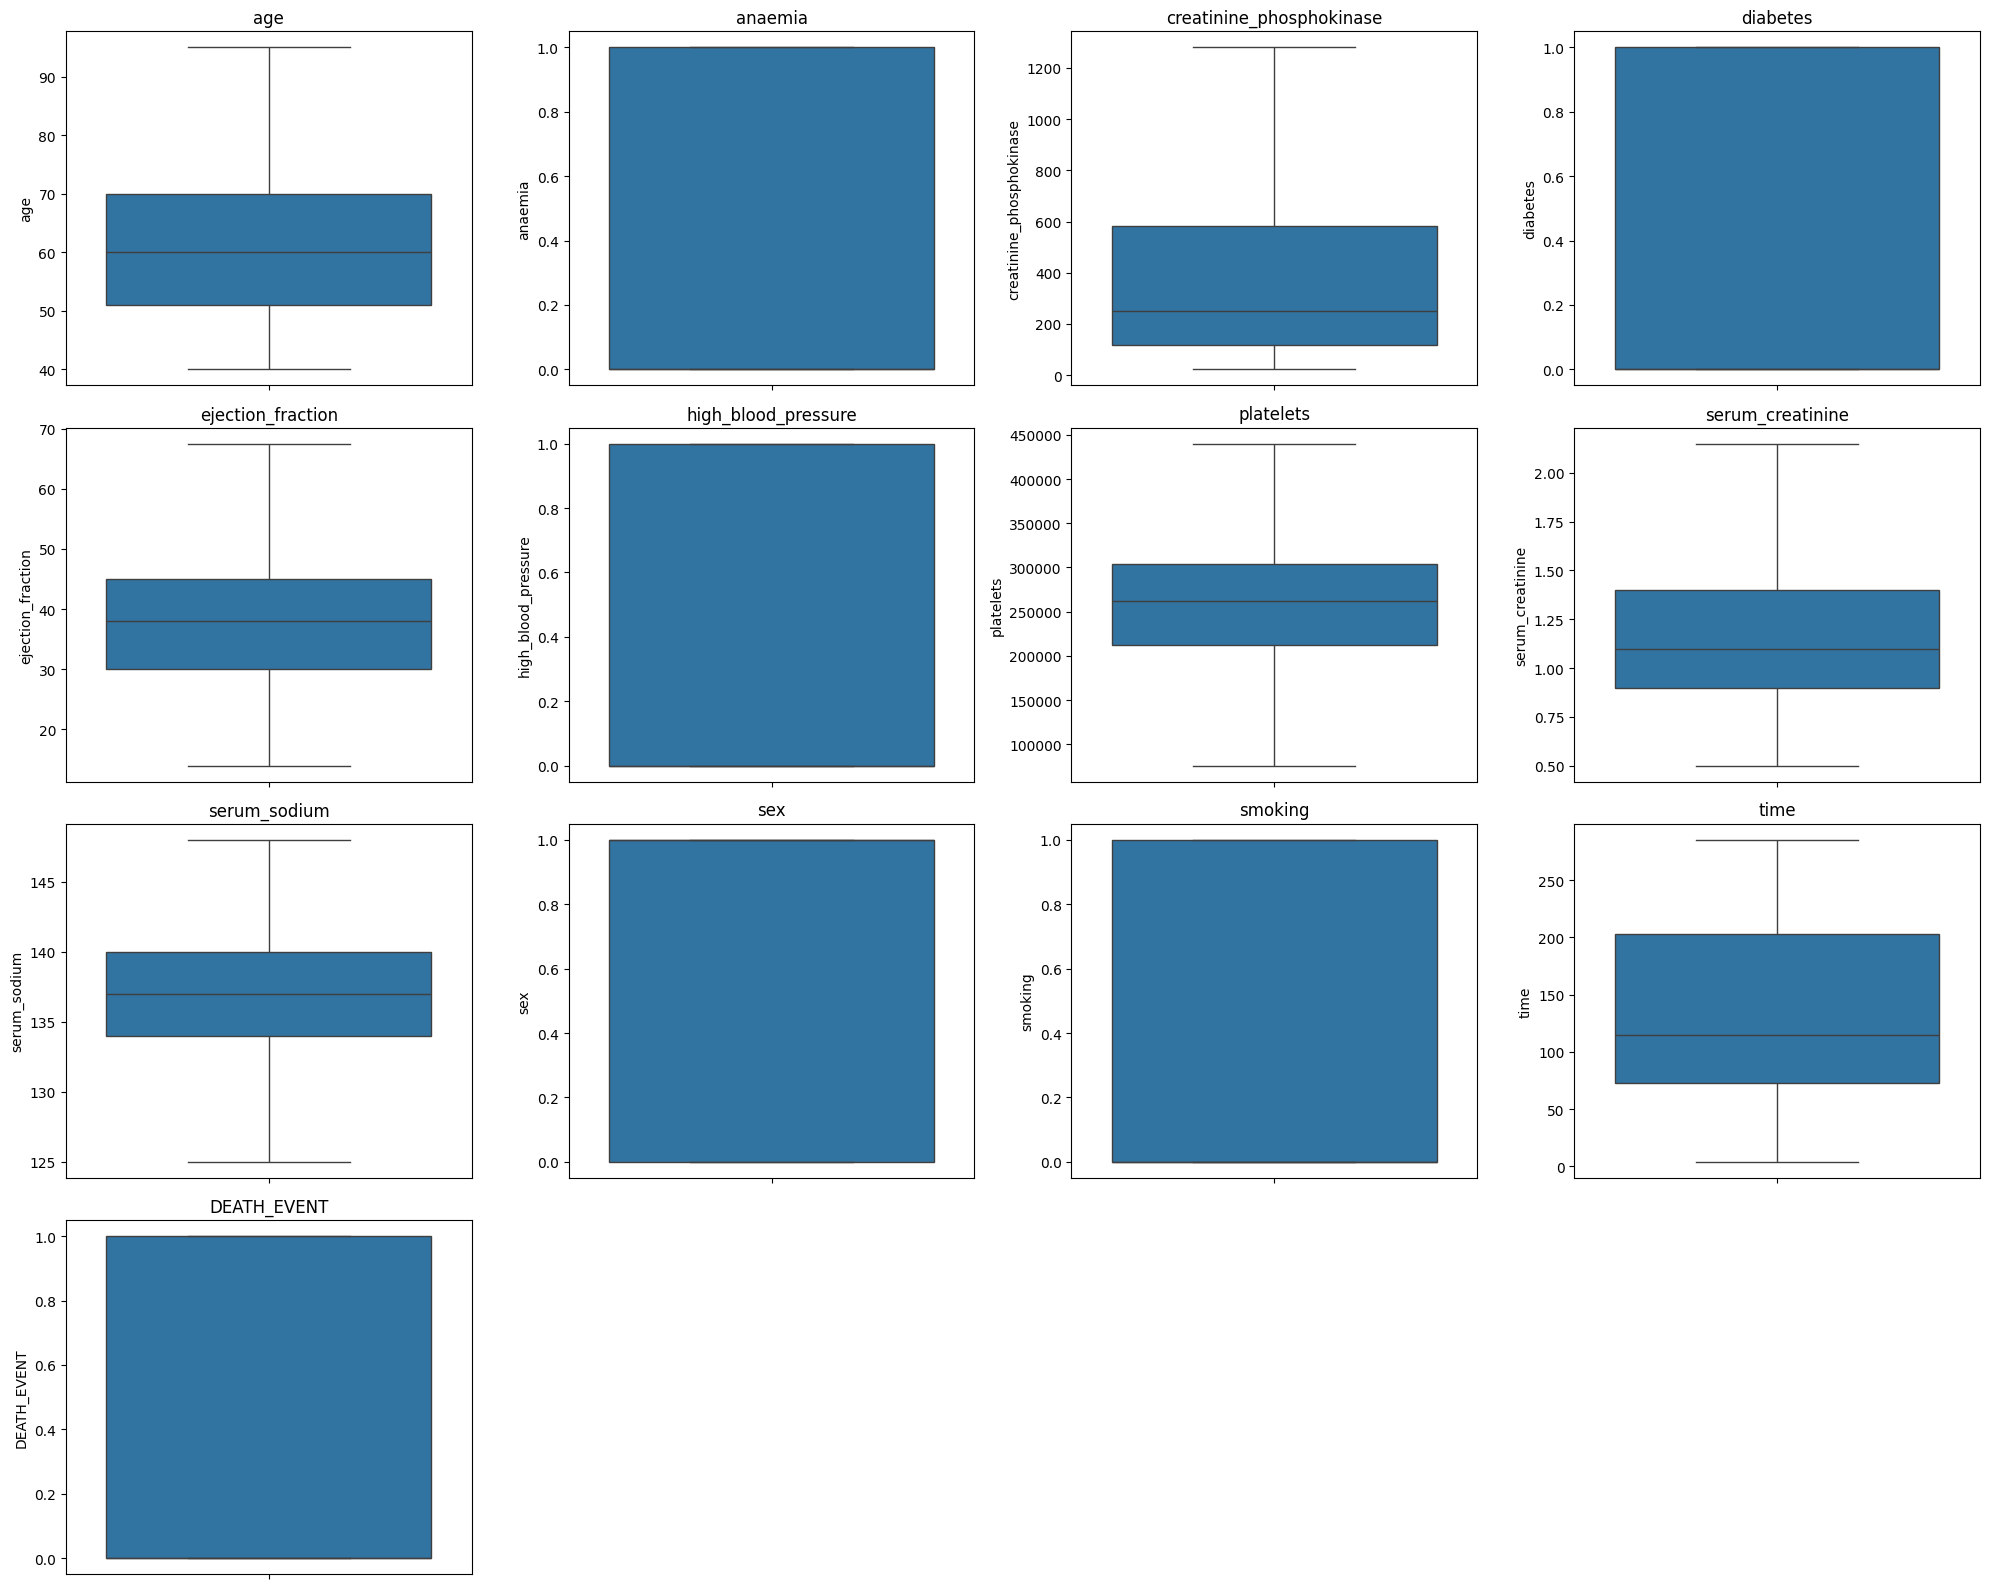

In [10]:
#Cek boxplot kembali
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Kolom numerik yang ingin dicek outliernya
num_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

cols = 4
rows = math.ceil(len(num_cols) / cols)

# Visualisasi Boxplot
plt.figure( figsize=(5*cols, 4*rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
#cek IQR kembali
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
anaemia: 0 outliers
creatinine_phosphokinase: 0 outliers
diabetes: 0 outliers
ejection_fraction: 0 outliers
high_blood_pressure: 0 outliers
platelets: 0 outliers
serum_creatinine: 0 outliers
serum_sodium: 0 outliers
sex: 0 outliers
smoking: 0 outliers
time: 0 outliers
DEATH_EVENT: 0 outliers


Karena outlier sudah ditangani, maka dapat lanjut ketahap selanjutnya.

##**Analisis Klasifikasi menggunakan KNN**

Membagi data (split data) dilakukan supaya kita bisa melatih model dengan sebagian data (data training) dan mengetes kemampuannya dengan data lain yang belum pernah dilihat (data testing). Meskipun KNN tidak melakukan pelatihan seperti model lainnya, pembagian ini tetap penting agar kita bisa melihat seberapa baik model bekerja saat menghadapi data baru.

Normalisasi fitur juga penting, terutama untuk KNN. Karena KNN menghitung jarak antar data, kalau ada fitur (kolom) yang angkanya jauh lebih besar dari yang lain, maka fitur itu bisa lebih berpengaruh dalam perhitungan. Nah, supaya semua fitur punya pengaruh yang seimbang, kita perlu menyesuaikan skala nilainya ini yang disebut normalisasi.

In [12]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 299
Total # of sample in train dataset: 239
Total # of sample in test dataset: 60


In [14]:
print(X_train)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    75.000        1                       246         0                 15   
183  75.000        0                        99         0                 38   
185  60.667        1                       104         1                 30   
146  52.000        0                       132         0                 30   
30   94.000        0                       582         1                 38   
..      ...      ...                       ...       ...                ...   
188  60.667        1                       151         1                 40   
71   58.000        0                       582         1                 35   
106  55.000        0                       748         0                 45   
270  44.000        0                       582         1                 30   
102  80.000        0                       898         0                 25   

     high_blood_pressure  platelets  serum_creatini

In [15]:
print(y_train)

6      1
183    1
185    1
146    0
30     1
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 239, dtype: int64


In [16]:
print(X_test)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   
278  50.0        1                      1051         1                 30   
93   60.0        1                       154         0                 25   
109  45.0        0                       292         1                 35   
5    90.0        1                        47         0                 40   
173  50.0        1                       115         0                 20   
97   70.0        1                        59         0                 60   
195  77.0        1                       418         0                 45   

In [17]:
print(y_test)

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
197    0
210    0
288    0
219    0
178    0
144    1
186    1
84     1
248    0
277    0
73     0
244    0
25     1
209    0
59     1
Name: DEATH_EVENT, dtype: int64


**Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print(X_train)

[[ 1.16420244  1.13933179 -0.35037003 ...  0.74293206 -0.67625223
  -1.56416577]
 [ 1.16420244 -0.87770745 -0.50593309 ...  0.74293206 -0.67625223
   0.37989712]
 [-0.03281933  1.13933179 -0.50064183 ...  0.74293206 -0.67625223
   0.4950061 ]
 ...
 [-0.50609935 -0.87770745  0.18087256 ...  0.74293206 -0.67625223
  -0.56655455]
 [-1.42476533 -0.87770745  0.0052027  ...  0.74293206  1.4787382
   1.42866789]
 [ 1.58177789 -0.87770745  0.33961039 ...  0.74293206  1.4787382
  -0.57934444]]


In [20]:
print(X_test.dtype)

float64


**Training the K-NN model on the Training set**

In [21]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])
    neighbors=[]
    for i in range(self.k):
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [22]:
model=KNN(5)
model.fit(X_train,y_train)

5


**Inisialisasi dan Latih Model KNN**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Prediksi KNN berdasarkan model yang dibangun**

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [27]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [28]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.11436541143654115
MSE data test: 0.23333333333333334


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

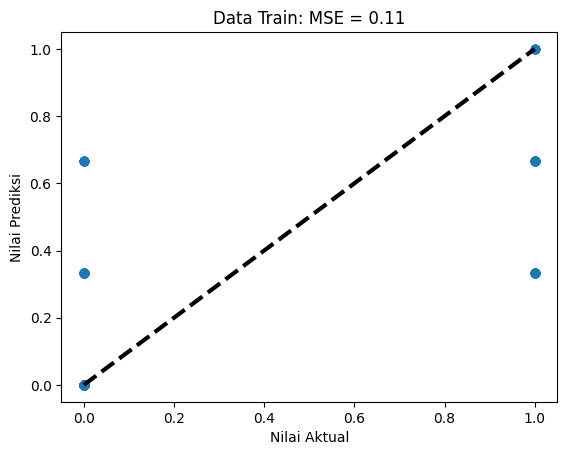

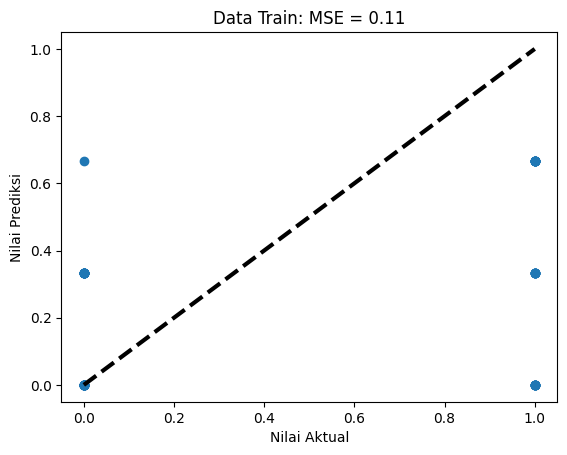

In [29]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

**Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks**

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  1]
 [18  7]]


0.6833333333333333

In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  1]
 [18  7]]


0.6833333333333333

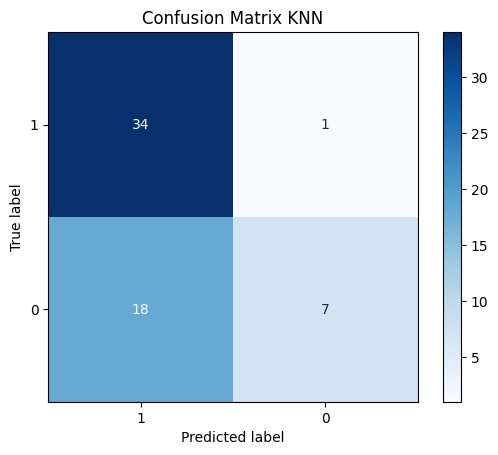

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
Depression_labels = data['DEATH_EVENT'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Depression_labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.show()

Nilai akurasi algoritma KNN adalah 68,3%

## **Analisis Klasifikasi menggunakan Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
nb = GaussianNB()

In [39]:
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
nb.score(X_train, y_train)

0.8117154811715481

In [41]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [42]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7000


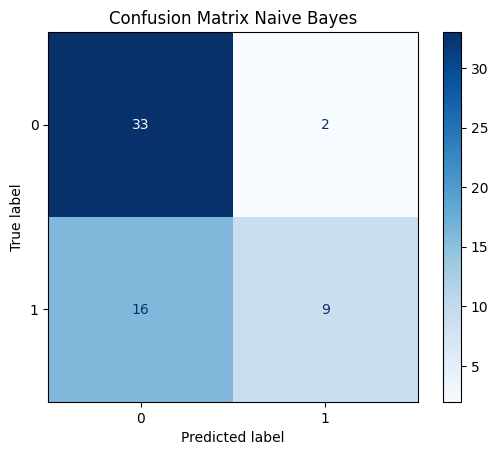

In [43]:
cm = confusion_matrix(y_test, y_predict['NB'], labels = nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Naive Bayes")
plt.show()

**Membuat model dengan Neural Network**

In [44]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [45]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 100}


In [46]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.1, max_iter=100)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.60      0.48      0.53        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.65      0.64        60



In [49]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.65

Output 0.65 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.65 berarti bahwa model berhasil memprediksi dengan benar sekitar 65% dari semua sampel pada data uji yang telah digunakan.
Jika dibandingkan dengan nilai akurasi klasifikasi menggunakan KNN dengan hasil akurasinya 68,3% diperoleh kesimpulan bahwa nilai akurasi klasifikasi menggunakan Naive Bayes lebih kecil daripada KNN. Jadi algoritma yang cocok untuk kasus ini adalah algoritma menggunakan KNN.